<a href="https://colab.research.google.com/github/DINH20104022/2014022-Hung-Minh-Tran-Dinh/blob/main/Mon_an_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [4]:
%cd /content/drive/MyDrive/DOWLOAD/MON AN

/content/drive/MyDrive/DOWLOAD/MON AN


In [5]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/MON AN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 31 images belonging to 10 classes.


In [7]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/MON AN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 31 images belonging to 10 classes.


In [8]:
training_set.class_indices

{'banh mi': 0,
 'banh xeo': 1,
 'bo kho': 2,
 'bun tra': 3,
 'com chay': 4,
 'com chien': 5,
 'goi cuon': 6,
 'hu tieu': 7,
 'pho': 8,
 'rau muong xao toi': 9}

In [9]:
test_set.class_indices

{'banh mi': 0,
 'banh xeo': 1,
 'bo kho': 2,
 'bun tra': 3,
 'com chay': 4,
 'com chien': 5,
 'goi cuon': 6,
 'hu tieu': 7,
 'pho': 8,
 'rau muong xao toi': 9}

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=500,batch_size=70,verbose=1)

1/1 [==============================] - 1s 532ms/step - loss: 7.0146e-04 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 1s 547ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 1s 578ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 1s 550ms/step - loss: 4.2435e-04 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 1s 547ms/step - loss: 8.7858e-04 - accuracy: 1.0000


In [12]:
model.save('do an VN.h5')

In [13]:
model_food = load_model('do an VN.h5')


In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 3.891432697855635e-06
Train Accuracy 1.0


1/1 [==============================] - 0s 89ms/step
Đây là : phở


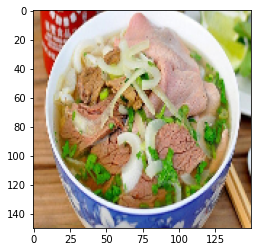

In [15]:
img = load_img('/content/pho.png',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_food=['rau muong xao toi',
 'Banh mi',
 'Banh xeo',
 'Com chien',
 'Com chay',
 'Bun cha',
 'hu tieu',
 'goi cuon',
 'phở',
 'Bo kho']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_food[a])